FIT EINER ALLGEMEINEN FUNKTION AN MESSDATEN
============================================

In diesem notebook kann aus Messwerten, gespeichert als .txt, eine Modellfunktion anhand der Methode der kleinsten Quadrate gewonnen werden. Der Code ist praktisch identisch mit dem Skript genfit.py.

Als erstes muss sichergestellt werden, dass die Messdaten in einem .txt file im working directory abgespeichert sind, d.h. in dem Verzeichnis, in dem dieses notebook abgespeichert liegt, bzw. ausgeführt wird.

Nun werden die erforderlichen libraries und Funktionen importiert:

In [1]:
#!/bin/python
# Geschrieben 10/2020, Henry Korhonen henryk@ethz.ch, basierend auf Matlabskripten von Martin Willeke. Hinweise, Bemerkungen und Vorschläge bitte an henryk@ethz.ch.

# importieren von libraries bzw. Funktionen.
import pandas as pd
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
from math import sqrt
import matplotlib.pyplot as plt

Als nächstes werden die Messdaten eingelesen. In der ersten Zeile muss sichergestellt werden, dass der Dateiname im Argument von read_table() exakt mit dem des Messwert-files übereinstimmt. Hier im Beispiel ist dies test_lin.txt. Die Messdaten müssen mit Leerschlägen getrennt werden. Alternativ kann man man den Parameter sep anpassen.

In [2]:
xy = pd.read_table('test_lin.txt', names=['x','y'], sep=r'\s+') # Lesen der Daten, erstellen eines Dataframes. Als Separator kommt hier eine unbestimmte Anzahl Leerschläge in Frage. Andernfalls "sep" anpassen.

y = xy['y'] # Relevante Daten aus dem Dataframe extrahieren. Achtung: "names" in pd.read_table gibt der ersten Spalte den Namen x und der zweiten y. Unbedingt sicherstellen, dass die richtigen Daten extrahiert werden!
x = xy['x']

N = len(y) # Anzahl Datenpunkte ermitteln. Diese Anzahl wird weiter unten benötigt, um die Anzahl Freiheitsgrade zu bestimmen.

Optional: Mit dem nächsten Stück code kann überprüft werden, ob die Daten richtig eingelesen wurden:

In [12]:
print('x:\n{0}\ny:\n{1}'.format(x, y))

x:
0     1.0
1     2.0
2     3.0
3     4.0
4     5.0
5     6.0
6     7.0
7     8.0
8     9.0
9    10.0
Name: x, dtype: float64
y:
0     18.4
1     28.9
2     35.5
3     55.1
4     59.0
5     72.1
6     78.0
7     87.0
8     99.0
9    111.0
Name: y, dtype: float64


Nun will eine Funktion definiert werden. Hier ist als Beispiel eine Funktion definiert, die von 5 Parametern abhängt.

In [13]:
def func(omega, taud, etazero, q, n): # Funktion definieren, die gefittet werden soll. Alle Variablen müssen im Argument (das in Klammern) angegeben werden.

    return etazero/( 1+(taud*omega)**q)**((1-n)/q) # Eta(Omega)=Etazero/( 1+(taud*Omega)^q)^((1-n)/q))

Im nächsten Schritt passiert die Ausgleichsrechnung. popt wird die 5 Regressionskoeffizienten enthalten, pcov enthält auf der Diagonalen die Varianz der jeweiligen Regressionskoeffizienten und deren Quadratwurzel ist die jeweilige Standardabweichung.

Optional: Die Auskommentierte Zeile tut das gleiche wie die erste, jedoch kann man dort einen Bereich angeben, in dem man die Koeffizienten vermutet. (Beispielsweise a würde zwischen alower und aupper vermutet werden)

In [15]:
popt, pcov = curve_fit(func, x, y, maxfev=50000) # fitten der Daten
pcov
# popt, pcov = curve_fit(func, x, y, bounds=([alower, blower], [aupper, bupper])) # fitten der Daten mit Eingrenzung der Regressionskoeffizienten
#pstd = np.sqrt(np.diag(pcov)) # Standardabweichung der Regressionskoeffizienten. Nota bene: auf der Diagonalen von pcov stehen die Varianzen der Regressionskoeffizienten.

array([[ 2.33381423e-07,  7.46855570e-03,  2.42719085e-03,
        -9.65308889e-01],
       [ 7.46855570e-03,  2.39827987e+02,  7.77916621e+01,
        -3.08807472e+04],
       [ 2.42719085e-03,  7.77916621e+01,  2.52599702e+01,
        -1.00377894e+04],
       [-9.65308889e-01, -3.08807472e+04, -1.00377894e+04,
         3.99283376e+06]])

Das m%-Vertrauensintervall lässt sich gemütlich in vier Zeilen berechnen. m muss in diesem Fall hardcoded sein, also durch alpha definiert werden: m = 100*(1-alpha). p wird ermittelt, um sogleich automatisch die Anzahl Freiheitsgrade korrekt zu berechnen (dof), mit welchen der korrekte Student-T-Faktor ermittelt werden kann (t.ppf()).


In [16]:
alpha = 0.05 # m%-Vertrauensintervall: m = 100*(1-alpha)
p = len(popt)
dof = max(0,N-p) # Anzahl Freiheitsgrade (nota bene: das hängt von der Anzahl Regressionskoeffizienten in der Fitfunktion ab (siehe def func(...) oben)
tinv = stats.t.ppf(1.0-alpha/2., dof) # Student-T-Faktor ermitteln

Nun ist alles berechnet und die Ausgabe der Daten kann beginnen. Die ersten vier Zeilen listen sämtliche Regressionskoeffizienten mit ihrem jeweiligen m%-Vertrauensintervall und der jeweiligen Standardabweichung sowie die Anzahl Messungen und Freiheitsgrade auf.

Danach werden die Daten und die gefittete Funktion zusammen geplottet. Dieser Plot wird noch nicht gezeigt, dies passiert erst ganz unten im code. Ebenfalls wird eine PNG-Datei sowie eine PDF-Datei davon erstellt. Für den Bericht ist die PDF-Datei am interessantesten, da sie Vektor- und keine Rastergrafik enthält. Der Dateiname sollte jeweils noch direkt im Skript unten im Argument von plt.savefig angepasst werden. Andere Dateitypen, bspw. .svg, können ebenfalls genutzt werden. Hierzu ist die dokumentation von matplotlib.pyplot.savefig hilfreich.

Et voilà.


Anzahl Freiheitsgrade: 6
Anzahl Messungen: 10
Parameter 1: 1.8992556024173274e-07 
 Vertrauensintervall: [-0.0011819025844703173  0.0011822824355908008] 
 Standardabweichung: 0.00048309566632500186 
Parameter 2: 0.15537523543855475 
 Vertrauensintervall: [-37.738433169869566  38.049183640746676] 
 Standardabweichung: 15.486380690019796 
Parameter 3: 0.14828710801992206 
 Vertrauensintervall: [-12.14972002527184  12.446294241311683] 
 Standardabweichung: 5.025929781395554 
Parameter 4: 8.333272198175731 
 Vertrauensintervall: [-4881.104670109659  4897.771214506011] 
 Standardabweichung: 1998.2076365858086 


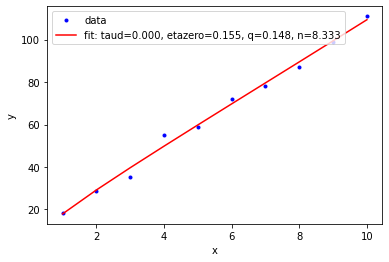

In [20]:
print('Anzahl Freiheitsgrade: {0}\nAnzahl Messungen: {1}\n=================================='.format(dof, N))
for i, regkoeff,var in zip(range(N), popt, np.diag(pcov)): # Hier werden alle Regressionskoeffizienten mit den entsprechenden Vertrauensintervallen ausgegeben.
    sigma = var**0.5
    print('Parameter {0}: {1} \n Vertrauensintervall: [{2}  {3}] \n Standardabweichung: {4} \n =================================='.format(i+1, regkoeff, regkoeff - sigma*tinv, regkoeff + sigma*tinv, sigma))

plt.plot(x,y,'b.',label='data') # Daten plotten
plt.plot(x, func(x, *popt), 'r-', label='fit: taud=%5.3f, etazero=%5.3f, q=%5.3f, n=%5.3f' % tuple(popt)) # Gefittete Funktion plotten. Auch hier muss angepasst werden, wenn mehr als nur a und b genutzt werden sollen (siehe def func(...) oben)


plt.xlabel('x') # Labels setzen
plt.ylabel('y')
plt.legend() # Legende generieren



plt.savefig("dateiname.pdf") # Plot als PDF-Datei speichern.
plt.savefig("dateiname.png") # Plot als PNG-Datei speichern.

plt.show() # Plot anzeigen